Name: Siddharth Byale

Github username : sidb98

USC ID : 5284615575



## 1. Decision Trees as Interpretable Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import KFold

In [29]:
col_name = ["Temperature", "Occurrence of nausea", "Lumbar pain", "Urine pushing", "Micturition pains", "Burning of urethra, itch, swelling of urethra outlet", "decision: Inflammation of urinary bladder", "decision: Nephritis of renal pelvis origin"]

df = pd.read_csv("../../data/diagnosis.data",encoding='utf_16',sep="\t", header=None, names=col_name)
df["Temperature"] =df["Temperature"].replace(',', '.', regex=True).astype(float)
for c in col_name:
    df[c] = df[c].replace(to_replace=['no', 'yes'], value=[0, 1])
df


,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


b) Build a decision tree on the whole data set and plot it

In [30]:
# %pip install scikit-multilearn
from skmultilearn.problem_transform import LabelPowerset

powerset = LabelPowerset()
y_transformed = powerset.transform(df.iloc[:,6:])
y_transformed


array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 0, 2, 2, 2, 3, 3, 2, 3, 0, 2, 2, 3, 3, 0, 2, 2,
       3, 0, 2, 2, 3, 2, 0, 2, 2, 2])

[Text(0.4, 0.9, 'Temperature <= 37.95\nentropy = 1.954\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\nentropy = 0.918\nsamples = 60\nvalue = [20, 40, 0, 0]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\nentropy = 1.448\nsamples = 60\nvalue = [10, 0, 31, 19]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\nentropy = 0.958\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\nentropy = 0.929\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

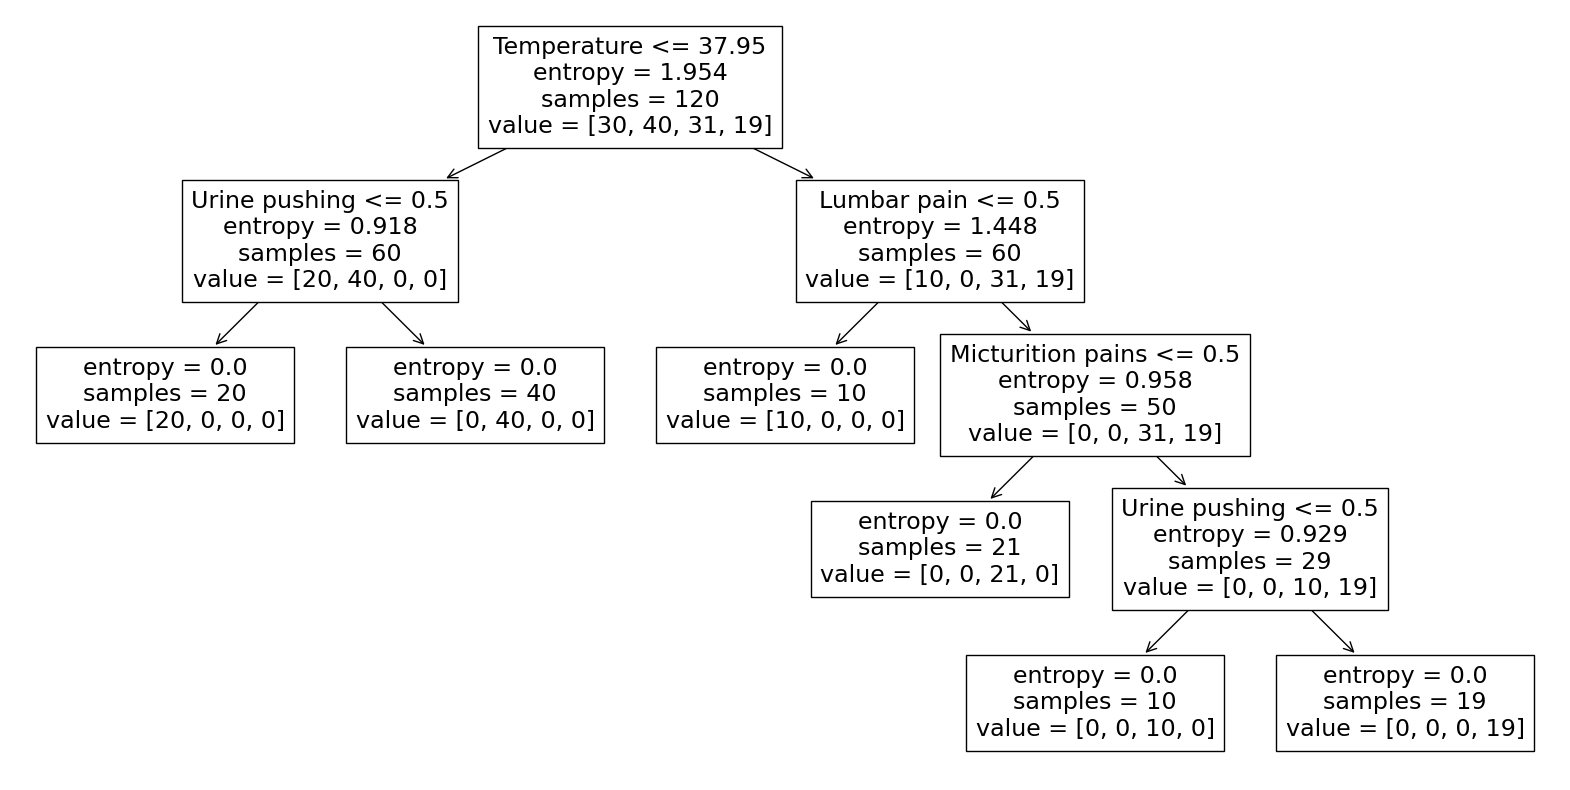

In [31]:
from sklearn import tree
X, y = df.iloc[:,0:6], y_transformed
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=df.columns)

c) Convert the decision rules into a set of IF-THEN rules.

In [32]:
from sklearn.tree import _tree


def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

tree_to_code(clf, df.columns)

  if Temperature <= 37.95000076293945:
    if Urine pushing <= 0.5:
      return [[20.  0.  0.  0.]]
    else:  # if Urine pushing > 0.5
      return [[ 0. 40.  0.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if Lumbar pain > 0.5
      if Micturition pains <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Micturition pains > 0.5
        if Urine pushing <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urine pushing > 0.5
          return [[ 0.  0.  0. 19.]]


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability.

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
path = clf.cost_complexity_pruning_path(X, y)

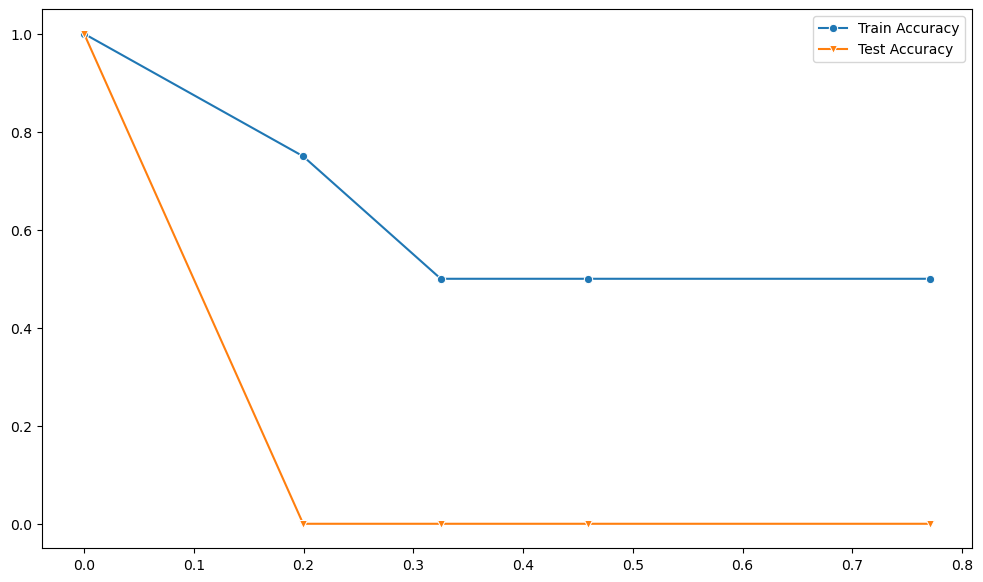

In [34]:
from sklearn.metrics import accuracy_score
accuracy_train, accuracy_test = [], []

X_train, y_train = df.iloc[:80,0:6], y_transformed[:80]
X_test, y_test = df.iloc[80:,0:6], y_transformed[80:]

for a in path.ccp_alphas:
    clf_a = tree.DecisionTreeClassifier(ccp_alpha = a)
    clf_a = clf_a.fit(X_train,y_train)
    y_pred = clf_a.predict(X_test)

    accuracy_train.append(accuracy_score(y_train,clf_a.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,y_pred))

plt.figure(figsize=(12,7))
sns.lineplot(y=accuracy_train, x =path.ccp_alphas, label = "Train Accuracy", marker="o")
sns.lineplot(y=accuracy_test, x =path.ccp_alphas, label = "Test Accuracy", marker="v")
plt.show()


[Text(0.4, 0.9, 'Temperature <= 37.95\nentropy = 1.954\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\nentropy = 0.918\nsamples = 60\nvalue = [20, 40, 0, 0]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\nentropy = 1.448\nsamples = 60\nvalue = [10, 0, 31, 19]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\nentropy = 0.958\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\nentropy = 0.929\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

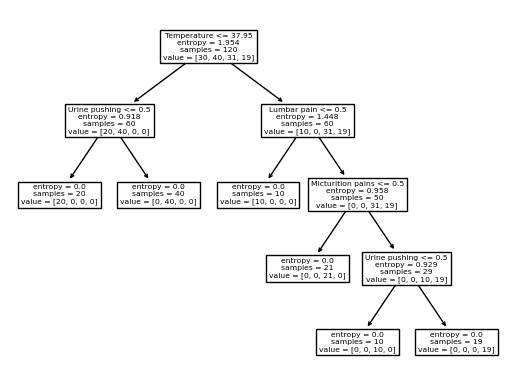

In [35]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(ccp_alpha =path.ccp_alphas[0],criterion='entropy')
clf2 = clf2.fit(X,y)
tree.plot_tree(clf2, feature_names=df.columns)

## 2) The LASSO and Boosting for Regression  
a) Use the first 1495 rows of data as
the training set and the rest as the test set.


In [9]:
community_name = '../../data/communities.names'
names =  pd.read_csv(community_name, sep="\t", skiprows=72, nrows=128)
names = names.iloc[:,0].tolist()
names = [x.split(" ")[1] for x in names]
names

['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'P

In [10]:
df = pd.read_csv('../../data/communities.data', header = None, names= names, na_values='?')
df = df.iloc[:,5:]
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [11]:
train_df =  df.iloc[:1495,:]
test_df = df.iloc[1495:,:]

b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [12]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
train_df = pd.DataFrame(imp_median.fit_transform(train_df), columns=names[5:])
test_df = pd.DataFrame(imp_median.transform(test_df), columns=names[5:])

In [13]:
train_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.07,0.03,0.76,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.07,0.03,0.76,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.07,0.03,0.76,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.03,0.76,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03


In [14]:
test_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.07,0.03,0.76,0.5,0.00,0.15,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.07,0.03,0.76,0.5,0.00,0.15,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.07,0.03,0.76,0.5,0.00,0.15,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.07,0.03,0.76,0.5,0.00,0.15,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.07,0.03,0.76,0.5,0.00,0.15,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.07,0.03,0.76,0.5,0.00,0.15,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


c) Plot a correlation matrix for the features in the data set.

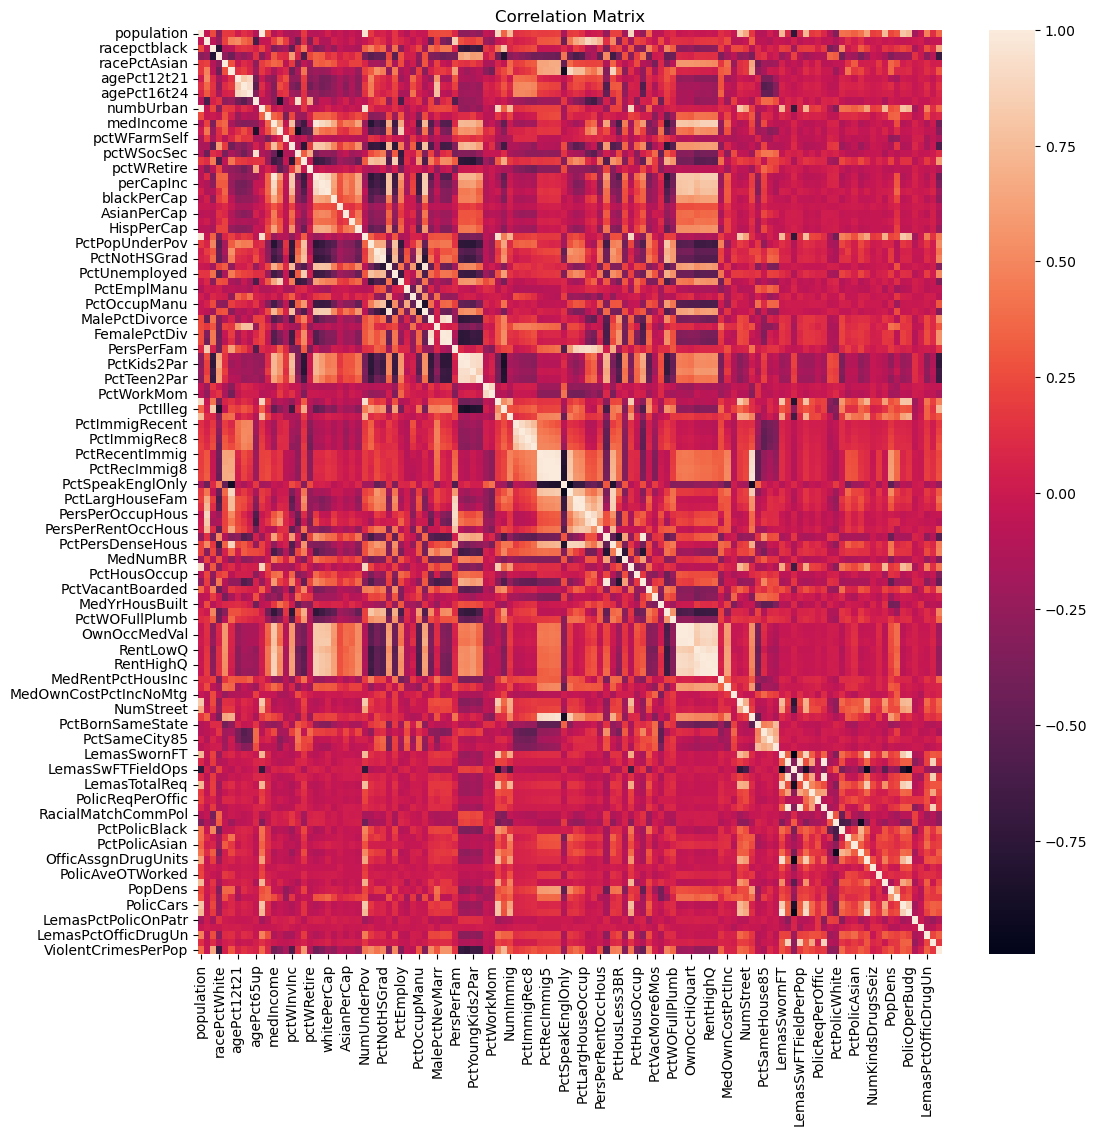

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_df.corr(), ax = ax)
plt.title("Correlation Matrix")
plt.show()


d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean

In [16]:
X_train = train_df.iloc[:,:-1]
cof_var = X_train.apply(lambda x: np.std(x)/np.mean(x), axis=0)
cof_var

population             2.240355
householdsize          0.355681
racepctblack           1.428407
racePctWhite           0.330102
racePctAsian           1.358645
                         ...   
PolicOperBudg          1.644957
LemasPctPolicOnPatr    0.111995
LemasGangUnitDeploy    0.334992
LemasPctOfficDrugUn    2.552092
PolicBudgPerPop        0.408513
Length: 122, dtype: float64

e) pick floor of $\sqrt{128}$ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [17]:
x = math.floor(math.sqrt(128))
top_features = cof_var.nlargest(n=x)
top_features

PctPolicAsian          5.525210
NumStreet              4.291487
NumInShelters          3.469791
NumIlleg               3.057941
NumImmig               2.925656
LemasPctOfficDrugUn    2.552092
NumUnderPov            2.341660
LemasSwornFT           2.247290
population             2.240355
numbUrban              2.037780
HousVacant             1.967809
dtype: float64

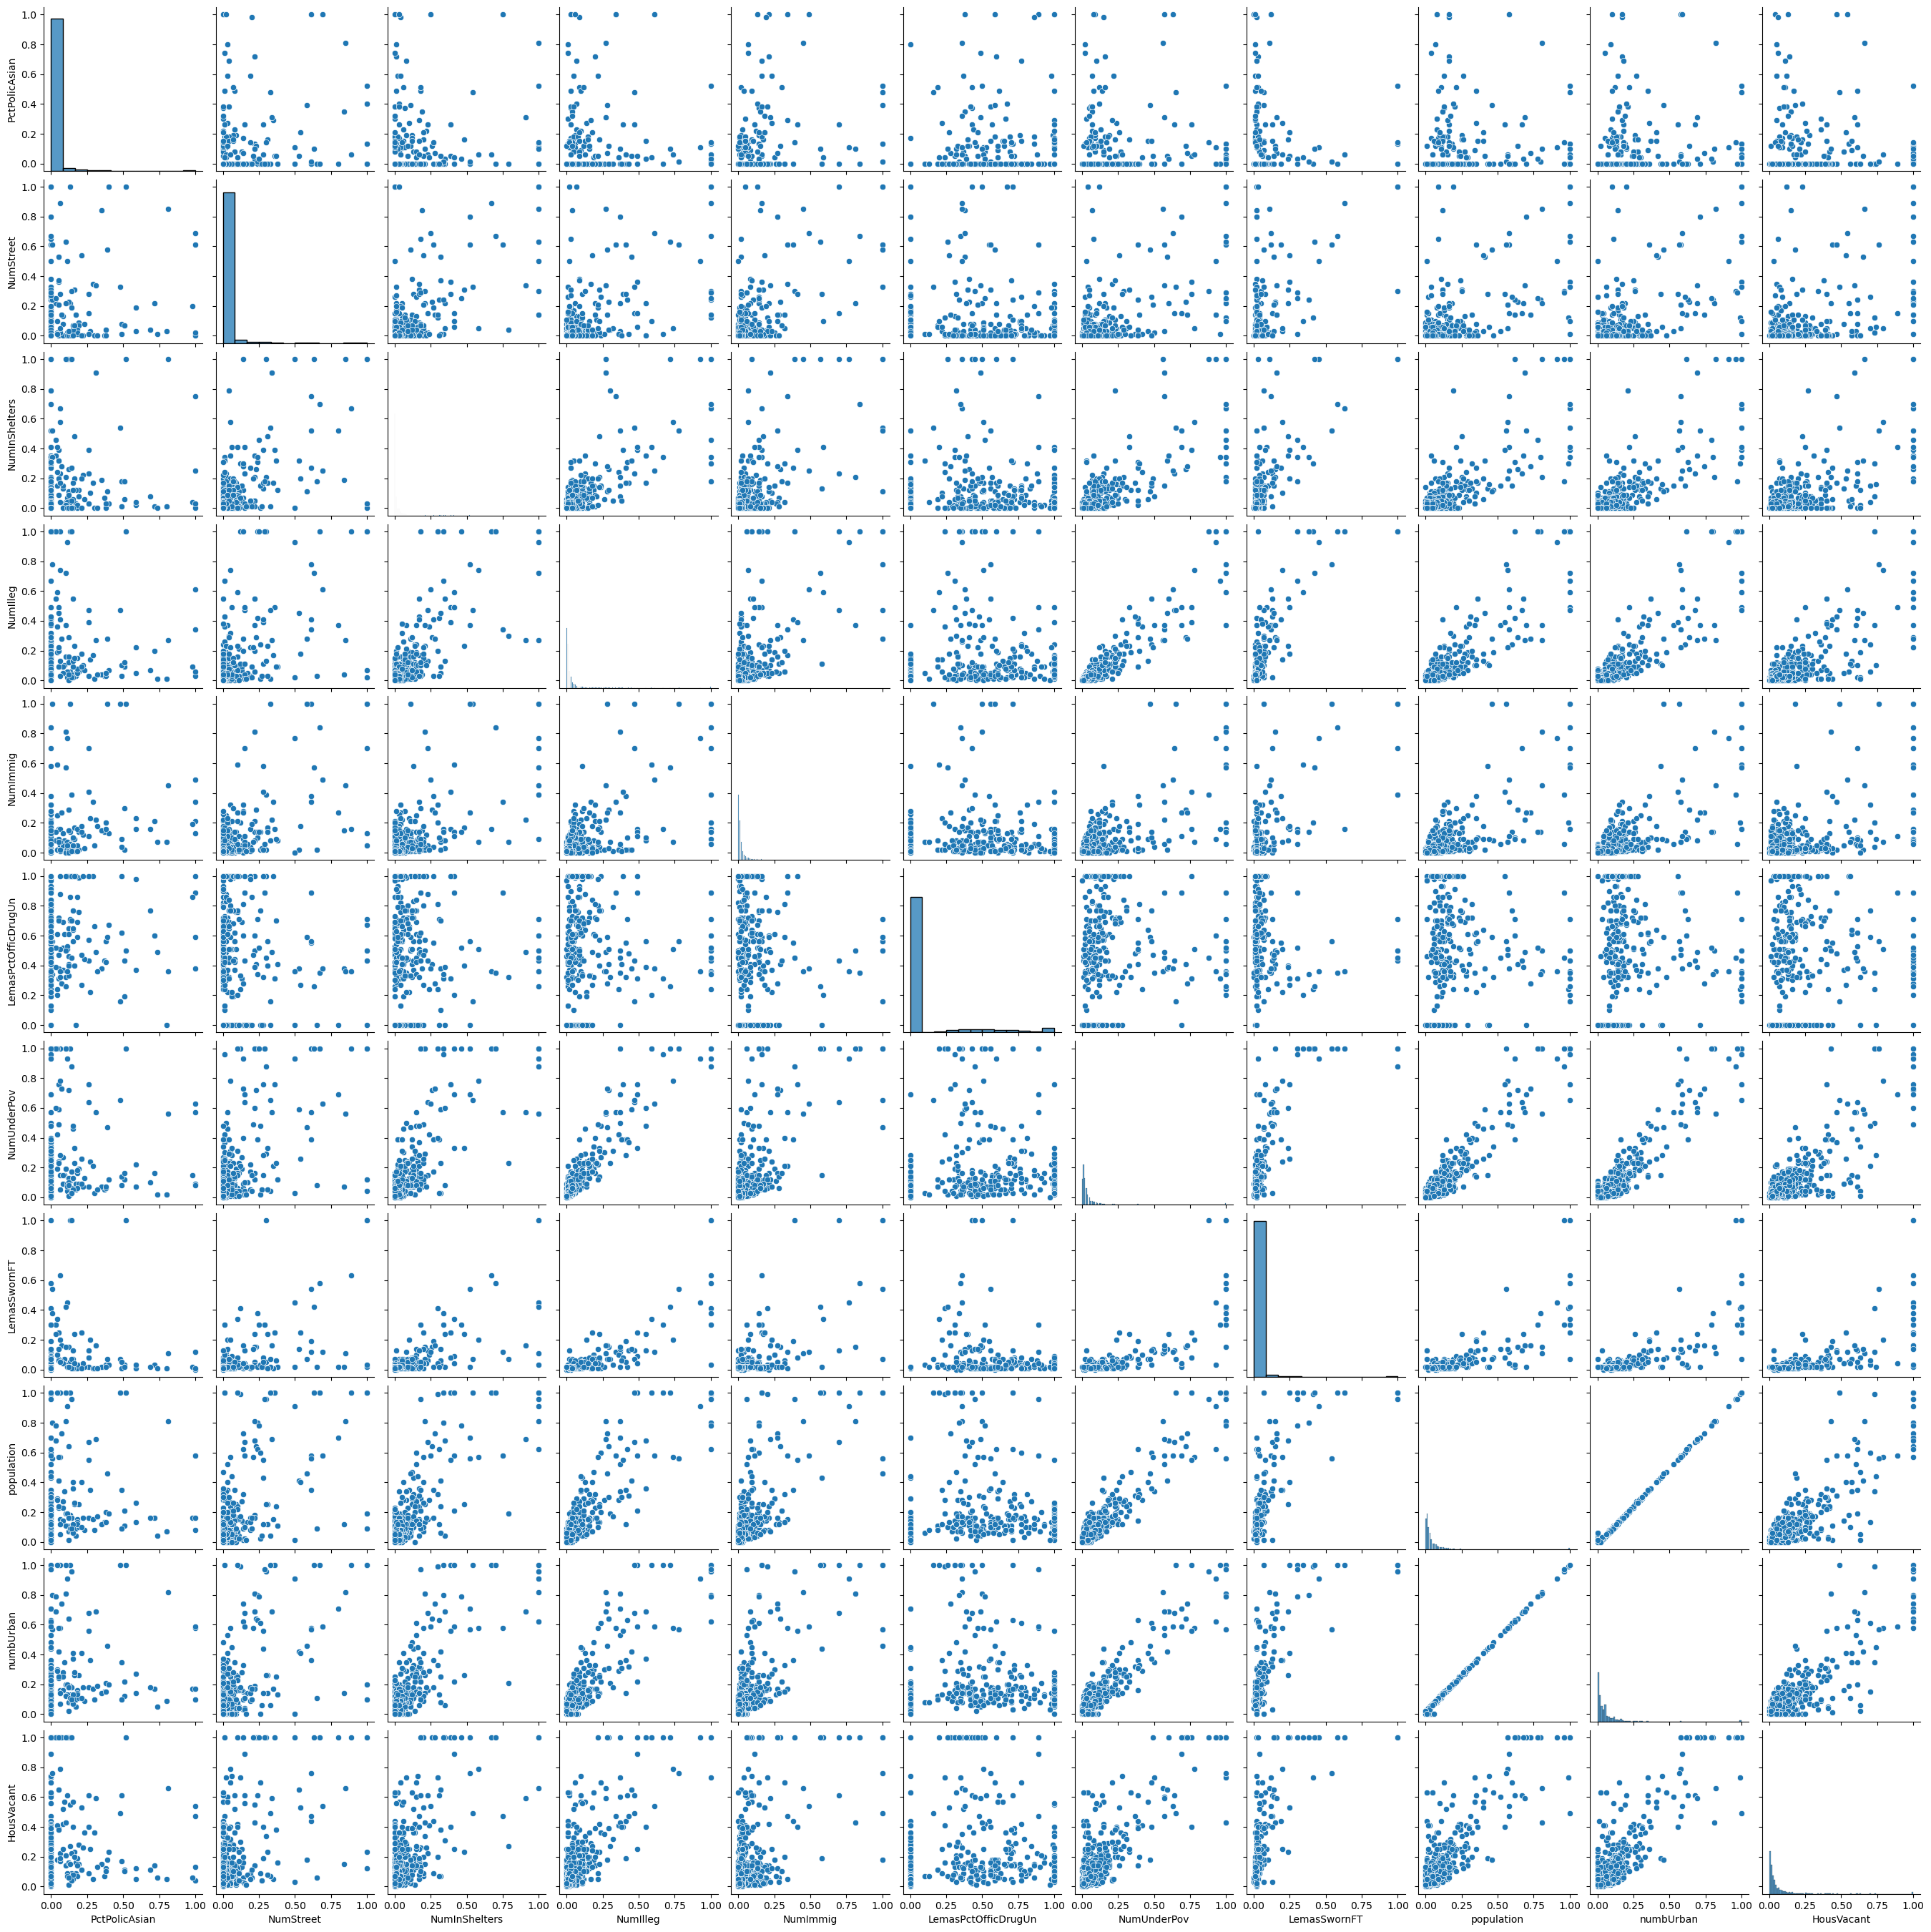

In [18]:
sns.pairplot(train_df[top_features.index.tolist()])
plt.show()

Its difficult to make any conclusions about significance of these faeatures just using scatter plot

<AxesSubplot:>

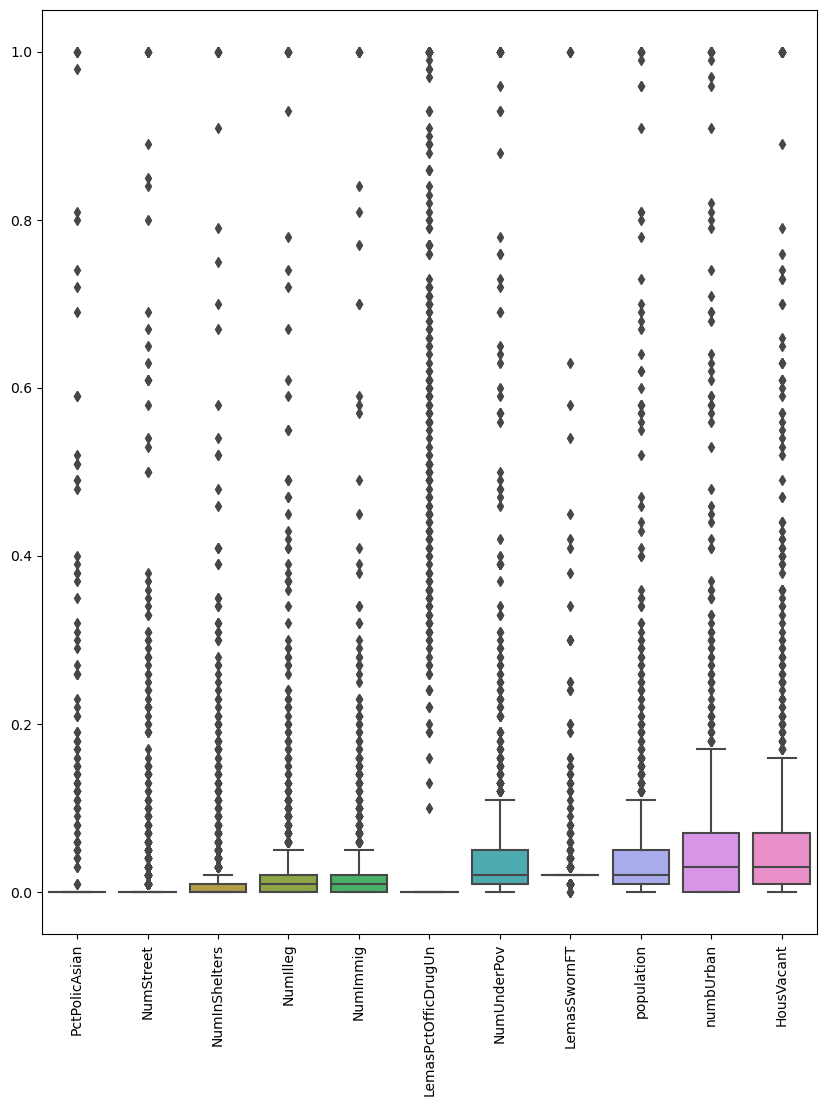

In [19]:
plt.figure(figsize=(10,12))
plt.xticks(rotation=90)
sns.boxplot(data = train_df[top_features.index.tolist()])

f) Fit a linear model using least squares to the training set and report the test error.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]

X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]

clf = LinearRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print("Test MSE for Linear Regression:", test_mse)

Test MSE for Linear Regression: 5.181276173815883e+16


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained.

In [21]:
from sklearn.linear_model import RidgeCV
alphas = [10**i for i in range(-11,10)]

ridge_clf = RidgeCV(alphas=alphas, cv=KFold(n_splits=5))
ridge_clf = ridge_clf.fit(X_train, y_train)
y_pred = ridge_clf.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print("Chosen lambda: ", ridge_clf.alpha_)
print("Test MSE for Ridge Regression:", test_mse)

Chosen lambda:  1.0
Test MSE for Ridge Regression: 0.01762824570678025


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized4 features. Report the test error for both cases and
compare them

In [22]:
from sklearn.linear_model import LassoCV

alphas = [10**i for i in range(-11,10)]

lasso_clf = LassoCV(max_iter=1000000, alphas=alphas, cv=KFold(n_splits=5) )
lasso_clf = lasso_clf.fit(X_train,y_train)

print("Chosen lambda: ", lasso_clf.alpha_)

y_pred = lasso_clf.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print("Test MSE for Lasso Regression:",test_mse)
print("Selected Features are")

new_col_names = names[5:-1]
selected_feat = []
for i in range(len(new_col_names)):
    if lasso_clf.coef_[i]!=0:
        selected_feat.append(new_col_names[i])
print(len(selected_feat))
print(selected_feat)

Chosen lambda:  0.0001
Test MSE for Lasso Regression: 0.01765867644581908
Selected Features are
75
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncN

In [23]:
#Scaled data Lasso Regression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

lasso_clf = LassoCV(max_iter=1000000, alphas=alphas, cv=KFold(n_splits=5))
lasso_clf = lasso_clf.fit(scaled_X_train,y_train)
print("Chosen lambda: ", lasso_clf.alpha_)


y_pred = lasso_clf.predict(scaled_X_test)
test_mse = mean_squared_error(y_test,y_pred)
print("Test MSE for Lasso Regression w scaled data ",test_mse)
print("Selected Features are")

selected_feat = []
for i in range(len(new_col_names)):
    if lasso_clf.coef_[i]!=0:
        selected_feat.append(new_col_names[i])

print(len(selected_feat))
print(selected_feat)


Chosen lambda:  0.001
Test MSE for Lasso Regression w scaled data  0.01764302466668196
Selected Features are
66
['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'PolicReqPerOffic', 'RacialMatchCommPol'

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [24]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

def PCACV(train_df,m):
    X_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]
    kf = KFold(n_splits=5)
    total_mse = 0
    for train_index, valid_index in kf.split(train_df):
        X_train_fold = X_train.iloc[train_index,:]
        y_train_fold = y_train.iloc[train_index]

        X_valid_fold = X_train.iloc[valid_index,:]
        y_valid_fold = y_train.iloc[valid_index]

        pca = PCA(n_components=m).fit(X_train_fold)
        X_train_components = pca.transform(X_train_fold)
        X_valid_components = pca.transform(X_valid_fold)

        pca_clf = LinearRegression()
        pca_clf = pca_clf.fit(X_train_components, y_train_fold)
        y_pred = pca_clf.predict(X_valid_components)

        test_mse =mean_squared_error(y_valid_fold, y_pred)
        total_mse+= test_mse
    
    return total_mse/5

In [25]:
# train_df has 122 predictors and 1 response

total_mse = []
for m in range(1, len(train_df.columns)):
    cv_mse = PCACV(train_df,m)
    total_mse.append(cv_mse)

print("Min Error at m = ",total_mse.index(min(total_mse))+1)
print("Min Error = ", min(total_mse))

Min Error at m =  96
Min Error =  0.019380405180100178


In [26]:
X_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]

X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]

pca = PCA(n_components=96).fit(X_train)
X_train_components = pca.transform(X_train)
X_test_components = pca.transform(X_test)

pca_clf = LinearRegression()
pca_clf = pca_clf.fit(X_train_components, y_train)
y_pred = pca_clf.predict(X_test_components)

test_mse =mean_squared_error(y_test, y_pred)
print("Test MSE for PCR",test_mse)

Test MSE for PCR 0.018339646732615983


(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine
α (the regularization term) using cross-validation.


In [27]:
# %pip install xgboost
import xgboost as xgb
from sklearn.model_selection import cross_val_score

X_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]


cv_mse = []
alpha = [10**i for i in range(-10,11)]

for a in alpha:
    xgbr = xgb.XGBRegressor(alpha = a, objective="reg:squarederror")
    cv_score = cross_val_score(xgbr, X_train, y_train, cv = KFold(n_splits=5), scoring='neg_mean_squared_error')
    cv_mse.append([a,abs(cv_score.mean())])


cv_mse.sort(key=lambda x:x[1])
print("For alpha = {} we ge minimum cross validation error {}".format(cv_mse[0][0], cv_mse[0][1]))


For alpha = 1 we ge minimum cross validation error 0.021485096543905888


In [28]:
X_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]
X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]

xgbr = xgb.XGBRegressor(alpha = cv_mse[0][0], objective="reg:squarederror")
xgbr = xgbr.fit(X_train,y_train)

y_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE for XGBoost",test_mse)

Test MSE for XGBoost 0.017717073173324917


## Reference

https://www.geeksforgeeks.org/replace-characters-in-strings-in-pandas-dataframe/#:~:text=We%20can%20replace%20characters%20using,as%20for%20a%20particular%20column.  
https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe 
https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree  
https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/#:~:text=Minimal%20Cost%2DComplexity%20Pruning%20is,known%20as%20the%20complexity%20parameter.&text=where%20%7CT%7C%20is%20the%20number,rate%20of%20the%20terminal%20nodes.  
https://stackoverflow.com/questions/71479659/dataframes-from-data-names-and-test-files-using-pandas  
https://datatofish.com/correlation-matrix-pandas/  
https://stackoverflow.com/questions/47462690/how-to-get-top-5-values-from-pandas-dataframe  
https://stackoverflow.com/questions/18358938/get-row-index-values-of-pandas-dataframe-as-list  
https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html  
https://scikit-learn.org/stable/modules/model_evaluation.html  
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/  